In [1]:
import pandas as pd
import numpy as np

## Print the first five rows of the training data to view the existing columns from which features can be calculated.
train_df = pd.read_csv('train.csv')

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Converting the date object to a date-time object for easier sorting.
train_df['Date'] =pd.to_datetime(train_df.Date)
train_df.sort_values(by=['Date']).head()
# We can see that there are days on which there was no sale. This would not help with the analysis.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1016473,379,2,2013-01-01,0,0,0,0,a,1
1016472,378,2,2013-01-01,0,0,0,0,a,1
1016471,377,2,2013-01-01,0,0,0,0,a,1
1016470,376,2,2013-01-01,0,0,0,0,a,1


In [3]:
# Counting the number of rows in the training set.
len(train_df)

1017209

In [4]:
# Removing the training data where sales did not take place.
train_df = train_df[train_df.Sales > 0]
len(train_df)

844338

In [5]:
# Calculating the Average sale per customer in the modified trainging set.
train_df['AvgSalePerCustomer'] = train_df['Sales']/train_df['Customers']
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,AvgSalePerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118


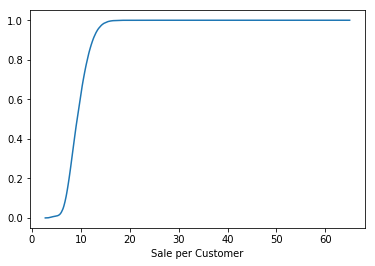

In [6]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
cdf = ECDF(train_df['AvgSalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.xlabel('Sale per Customer');
plt.show()

In [7]:
# The store gives us more information about the store and granular information about the items on sale.
store_df = pd.read_csv('store.csv')
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)
# replace NA's by 0
store_df.fillna(0, inplace = True)

## Convert Assortment, store type and PromoInterval as numbers to use as features
# a = 0, b = 1, c = 3, d = 4.
store_df['StoreType'] = store_df['StoreType'].apply({'a':0, 'b':1, 'c':2, 'd':3 }.get)
store_df['Assortment'] = store_df['Assortment'].apply({'a':0, 'b':1, 'c':2, 'd':3 }.get)
store_df['PromoInterval'] = store_df['PromoInterval'].apply({0:0, 'Jan,Apr,Jul,Oct':1, 'Mar,Jun,Sept,Dec':2}.get)
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1.0
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,1.0
3,4,2,2,620.0,9.0,2009.0,0,0.0,0.0,0.0
4,5,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0.0


In [8]:
print(max(store_df['CompetitionOpenSinceYear']), max(store_df['CompetitionOpenSinceMonth']))

2015.0 12.0


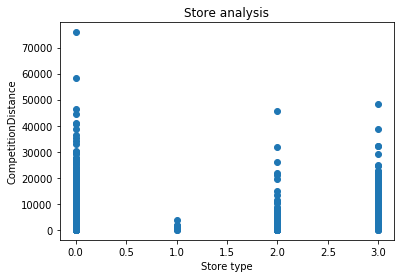

In [9]:
## Plot competition distance based on store type.

import matplotlib as mpl

mpl.rcParams['agg.path.chunksize'] = 10000
plt.figure()
x = store_df['StoreType']
y1 = store_df['CompetitionDistance']
plt.title('Store analysis')
plt.xlabel('Store type')
plt.ylabel('CompetitionDistance')
plt.scatter(x,y1)
plt.show()

In [10]:
train_merge = pd.merge(train_df, store_df, on='Store')
train_merge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,AvgSalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0
1,1,4,2015-07-30,5020,546,1,1,0,1,9.194139,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0
2,1,3,2015-07-29,4782,523,1,1,0,1,9.143403,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0
3,1,2,2015-07-28,5011,560,1,1,0,1,8.948214,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0
4,1,1,2015-07-27,6102,612,1,1,0,1,9.970588,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0


In [11]:
# Nnumber of stores available for analysis 

len(train_merge.Store.unique())

1115

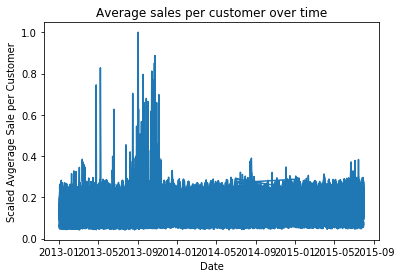

In [12]:
## Plot sale/customer for different dates.

import matplotlib.pyplot as plt

mpl.rcParams['agg.path.chunksize'] = 10000
plt.figure()
x = train_merge['Date']
y1 = train_merge['AvgSalePerCustomer']/max(train_merge['AvgSalePerCustomer'])
plt.title('Average sales per customer over time')
plt.xlabel('Date')
plt.ylabel('Scaled Avgerage Sale per Customer')
plt.plot(x,y1)
plt.show()

In [13]:
## Sales seem to be high during the end of the year. This could be because of promotions or holidays.

train_merge['Year'] = pd.DatetimeIndex(train_merge['Date']).year 
train_merge['Month'] = pd.DatetimeIndex(train_merge['Date']).month 
train_merge = train_merge.drop(['Date'], axis=1)

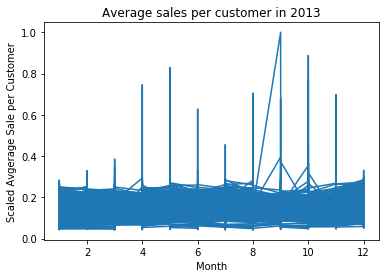

In [14]:
plt.figure()
data_2013 = train_merge[train_merge.Year==2013]
x = data_2013['Month']
y1 = data_2013['AvgSalePerCustomer']/max(data_2013['AvgSalePerCustomer'])
plt.title('Average sales per customer in 2013')
plt.xlabel('Month')
plt.ylabel('Scaled Avgerage Sale per Customer')
plt.plot(x,y1)
plt.show()

In [15]:
train_merge = train_merge[train_merge.Open==1]

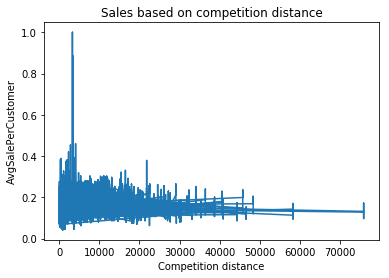

In [16]:
train_merge['CompetitionDistance'].isnull().values.any()
train_merge['CompetitionDistance'].fillna(0, inplace=True)

plt.figure()
plt.plot(train_merge['CompetitionDistance'], train_merge['AvgSalePerCustomer']/max(train_merge['AvgSalePerCustomer']))
plt.title('Sales based on competition distance')
plt.xlabel('Competition distance')
plt.ylabel('AvgSalePerCustomer')
plt.show()

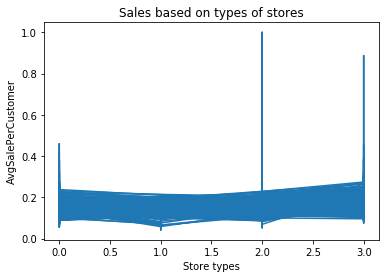

In [17]:
train_merge['StoreType'].isnull().values.any()
train_merge['StoreType'].fillna(0, inplace=True)

plt.figure()
plt.plot(train_merge['StoreType'], train_merge['AvgSalePerCustomer']/max(train_merge['AvgSalePerCustomer']))
plt.title('Sales based on types of stores')
plt.xlabel('Store types')
plt.ylabel('AvgSalePerCustomer')
plt.show()

## We see that store type c and d have more sales than store type a and b.

In [18]:
print(train_merge['StateHoliday'].unique())

['0' 0 'a' 'b' 'c']


In [19]:
train_merge['StateHoliday'] = train_merge['StateHoliday'].apply({'0':0, 'a':1, 'b':2, 'c':3, 0:0 }.get)
print(train_merge['StateHoliday'].unique())

[0 1 2 3]


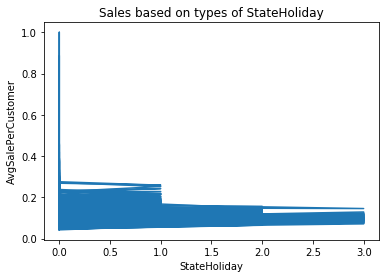

In [20]:
plt.figure()
plt.plot(train_merge['StateHoliday'], train_merge['AvgSalePerCustomer']/max(train_merge['AvgSalePerCustomer']))
plt.title('Sales based on types of StateHoliday')
plt.xlabel('StateHoliday')
plt.ylabel('AvgSalePerCustomer')
plt.show()

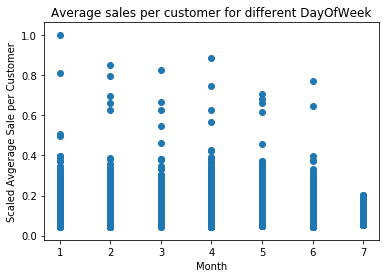

In [21]:
plt.figure()
x = train_merge['DayOfWeek']
y1 = train_merge['AvgSalePerCustomer']/max(train_merge['AvgSalePerCustomer'])
plt.title('Average sales per customer for different DayOfWeek')
plt.xlabel('Month')
plt.ylabel('Scaled Avgerage Sale per Customer')
plt.scatter(x,y1)
plt.show()

In [22]:
train_merge.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,AvgSalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263,555,1,1,0,1,9.482883,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,7
1,1,4,5020,546,1,1,0,1,9.194139,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,7
2,1,3,4782,523,1,1,0,1,9.143403,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,7
3,1,2,5011,560,1,1,0,1,8.948214,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,7
4,1,1,6102,612,1,1,0,1,9.970588,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,7


In [23]:
# feature set is finally ready after pre-processing.
X_train = train_merge
X_train = X_train.drop(['Sales'], axis=1)
X_train =X_train.drop(['Customers'], axis=1)
X_train.fillna(0, inplace = True)
X_train.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,AvgSalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,1,1,0,1,9.482883,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,7
1,1,4,1,1,0,1,9.194139,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,7
2,1,3,1,1,0,1,9.143403,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,7
3,1,2,1,1,0,1,8.948214,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,7
4,1,1,1,1,0,1,9.970588,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,7


In [29]:
# Principal component analysis for feature reduction

from sklearn.decomposition import PCA

nf = 10
pca = PCA(n_components=nf)
# X is the matrix transposed (n samples on the rows, m features on the columns)
X_new = pca.fit_transform(X_train)
X_new.shape

(844338, 10)

In [33]:
y_train = train_merge['Sales']
y_train.fillna(0, inplace = True)
y_train.shape

(844338,)

In [25]:
test_df = pd.read_csv('test.csv')
test_df['Date'] =pd.to_datetime(test_df.Date)
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [26]:
test_merge = pd.merge(test_df, store_df, on='Store')
test_merge.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0
1,857,1,3,2015-09-16,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0
2,1713,1,2,2015-09-15,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0
3,2569,1,1,2015-09-14,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0
4,3425,1,7,2015-09-13,0.0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0


In [27]:
test_merge['StateHoliday'] = test_merge['StateHoliday'].apply({'0':0, 'a':1, 'b':2, 'c':3, 0:0 }.get)
print(test_merge['StateHoliday'].unique())

[0 1]


In [28]:
test_merge['Year'] = pd.DatetimeIndex(test_merge['Date']).year 
test_merge['Month'] = pd.DatetimeIndex(test_merge['Date']).month 
test_merge = test_merge.drop(['Date'], axis=1)
test_merge.fillna(0, inplace = True)
test_merge.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,1,4,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,9
1,857,1,3,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,9
2,1713,1,2,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,9
3,2569,1,1,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,9
4,3425,1,7,0.0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,9


In [29]:
test_merge = test_merge.drop(['Id'], axis=1)
test_merge.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,4,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,9
1,1,3,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,9
2,1,2,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,9
3,1,1,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,9
4,1,7,0.0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,9


In [30]:
X_test = test_merge

In [34]:
# Classification

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

clf_rf = RandomForestClassifier()
clf_nb = GaussianNB()
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20, criterion='entropy', splitter='random'),
                        algorithm="SAMME.R")

In [37]:
from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_new, y_train, test_size=0.75, random_state=42)

In [38]:
X_train_c.shape

(211084, 10)

In [41]:
y_train_c.shape

(211084,)

In [43]:
from sklearn.model_selection import train_test_split
X_train_c2, X_test_c2, y_train_c2, y_test_c2 = train_test_split(X_train_c, y_train_c, test_size=0.45, random_state=42)

In [ ]:
clf_rf.fit(X_train_c, y_train_c)
scores = clf_rf.score(X_test_c, y_test_c)
print(scores)

In [45]:
X_train_c2.shape

(116096, 10)

In [ ]:
clf_nb.fit(X_train_c2, y_train_c2)
scores = clf_nb.score(X_test_c2, y_test_c2)
print(scores)

In [ ]:
clf.fit(X_train_c, y_train_c)
scores = clf.score(X_test_c, y_test_c)
print(scores)